
Epoch 1/30


1500/1500 [==============================] - 15s 9ms/step - loss: 0.5794 - accuracy: 0.7910 - val_loss: 0.3754 - val_accuracy: 0.8592
Epoch 2/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4003 - accuracy: 0.8570 - val_loss: 0.3117 - val_accuracy: 0.8864
Epoch 3/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3507 - accuracy: 0.8748 - val_loss: 0.2758 - val_accuracy: 0.8999
Epoch 4/30
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3206 - accuracy: 0.8838 - val_loss: 0.2731 - val_accuracy: 0.8979
Epoch 5/30
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2957 - accuracy: 0.8926 - val_loss: 0.2556 - val_accuracy: 0.9060
Epoch 6/30
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2807 - accuracy: 0.8966 - val_loss: 0.2511 - val_accuracy: 0.9062
Epoch 7/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2700 - accuracy: 0.9011 - val_loss: 0.2442 - val

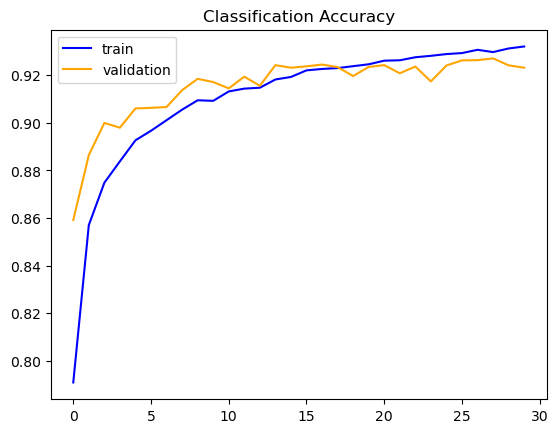

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import History

# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values of the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to include a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define the model architecture
# net = keras.models.Sequential([
#     # Input layer that flattens the image
#     Flatten(input_shape=[28, 28, 1]),
#     # First convolutional block
#     Conv2D(32, kernel_size=3, activation='relu', padding='same'),
#     MaxPooling2D(2),
#     Dropout(0.25),
#     # Second convolutional block
#     Conv2D(64, kernel_size=3, activation='relu', padding='same'),
#     MaxPooling2D(2),
#     Dropout(0.25),
#     # Flatten the output of the convolutions
#     Flatten(),
#     # Dense hidden layer
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     # Output layer
#     Dense(10, activation='softmax')
# ])
net = keras.models.Sequential([
    # First convolutional block
    Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=[28, 28, 1]),
    MaxPooling2D(2),
    Dropout(0.25),
    # Second convolutional block
    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Dropout(0.25),
    # Flatten the output of the convolutions
    Flatten(),
    # Dense hidden layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Output layer
    Dense(10, activation='softmax')
])



# Compile the model
net.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = net.fit(train_images, train_labels, epochs=30, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = net.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

# Plot training history
def plot_training_history(history: History):
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='validation')
    plt.legend()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)
